# Importing Libraries

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

### Reading Dataset/csv file

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

### Grouping of Area type

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## 1. Data Cleaning

### Dropping the unnecessary columns

In [5]:
df1 = df.drop(['area_type', 'society', 'balcony', 'availability'],axis='columns')
# df1.shape
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Handling na values

In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2.shape

(13246, 5)

### Cleaning of given size variants into one by creating new 'column - bhk'

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ms\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Resolving error from 'total_sqft' column

In [13]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_float('2100-2850')

2475.0

In [19]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_float)
df3.head(25)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [20]:
df3.loc[11130]

location      KR Puram
size             2 BHK
total_sqft        1204
bath                 2
price               58
bhk                  2
Name: 11130, dtype: object

In [21]:
df3.loc[1]

location      Chikka Tirupathi
size                 4 Bedroom
total_sqft                2600
bath                         5
price                      120
bhk                          4
Name: 1, dtype: object

## 2. Feature Engineering & Dimensionality Reduction

In [22]:
df4 = df3.copy()
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Creating a new feature for outlier detection & removal - 'price_per_sqft'

In [23]:
df4['price_per_sqft'] = df4['price'] * 100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df4['location'].unique()) # High Dimensionality Curve or Dimensionality Curse or Too many features

1304

### Reducing High Dimensionality Curve or Dimensionality Curse or Too many features

In [26]:
df4['location'] = df4['location'].apply(lambda x: x.strip()) 

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False) # Data points available per location
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [27]:
len(location_stats[location_stats<=10])

1052

In [28]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [29]:
len(df4.location.unique())

1293

### Now putting all these data points in another category called 'other'

In [30]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)
len(df4['location'].unique())

242

In [31]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## 3. Outlier Detection & Removal

In [32]:
# Let's assume that typical threshold value for 'per bhk' is "300 sqft per bhk".
# So we have to find those property/house which does not match our threshold value.
## Outlier Detected

df4[df4['total_sqft'] / df4['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df4.shape

(13246, 7)

### Removing Outlier in 'per bhk'

In [34]:
# According to assumption of a typical threshold value for 'per bhk' is "300 sqft per bhk".
# So we have to remove those property/house which does not match our threshold value.
## Outlier Removed

df5 = df4[~(df4['total_sqft'] / df4['bhk'] < 300)]
df5.shape

(12502, 7)

### Detection & Removal of Outlier in 'price_per_sqft' column

In [35]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
# There is minimum price & maximum price has extremely low & High, which is wrong according to dataset.
# So, gonna create a function which takes Dataframe as parameter & finds 'mean' & 'Standard deviation' of each n every location
# And filter out Or remove those outliers.
## Outlier Removed

def remove_pps_outliers(df):
    df_output = pd.DataFrame()
    
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        st = np.std(sub_df.price_per_sqft)
        
        reduced_df = sub_df[(sub_df.price_per_sqft > (m - st)) & (sub_df.price_per_sqft <= (m + st))]
        df_output = pd.concat([df_output, reduced_df], ignore_index=True)
    
    return df_output

df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

### Detection & Removal of Outlier from price difference

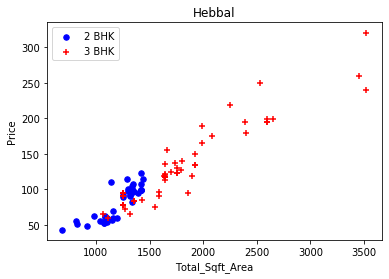

In [37]:
# In our dataset price of '3bhk' is lesser than the price of '2bhk' in some rows.
# So, here also we create a function which plot scatter of those bhk's & it visualize the problem of price difference.

def plot_scatter_of_bhk(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
#     matplotlib.rcParams['figure.figsize'] = (10, 5)
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=30)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='red', label='3 BHK', s=30)
    
    plt.xlabel('Total_Sqft_Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_of_bhk(df6, "Hebbal")

#### We should also remove properties where for same loaction, the price, For Ex- 3 bhk is less than 2 bhk(with sam esqft area).
#### What we will do is for a given location, we will build a dictionary of statistics per bhk, i.e,
#####  {
#####   '1' : {
#####       'mean' : 4000,
#####       'std'  : 2000,
######      'count': 24
#####    }
#####   '2' : {
#####       'mean' : 4300,
#####       'std' : 2300,
#####       count  : 22
#####    }
#####  }
#### Now we cxan remove those 2 BHK whose price_per_sqft less than mean price_per_sqft of 1 BHK. 

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5 :
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

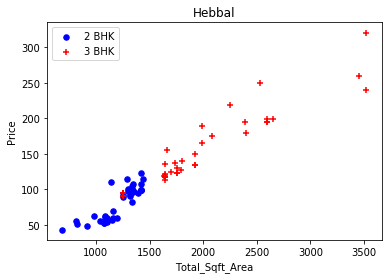

In [39]:
plot_scatter_of_bhk(df7, "Hebbal")

Text(0, 0.5, 'Count')

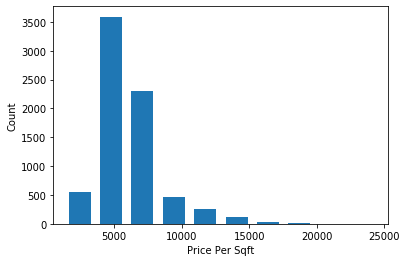

In [40]:
# Showing no. of properties/apartments available in per_sqft area by Histogram.

plt.hist(df7.price_per_sqft, rwidth=0.7)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')

In [41]:
# Exploring Bathroom feature in datset.

df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

### Detection & Removal of bathromm(bath) column

Text(0, 0.5, 'Count')

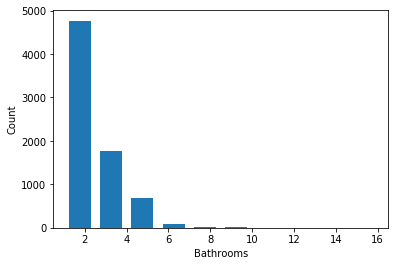

In [42]:
# let's see the Histogram that shows how many bathroom we have

plt.hist(df7.bath, rwidth=0.7)
plt.xlabel('Bathrooms')
plt.ylabel('Count')

In [43]:
# As we see 13 types of bathroom we have,so we have to remove those outliers(those bathroom who is higher in no. of there bhks).
# Our threshold value of having bathroom is that, any time bath you have is +2 of bhk.
# Let's see how much we have..

df7[df7['bath'] > df7['bhk'] + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [44]:
# Outlier removed

df8 = df7[df7['bath'] < df7['bhk'] + 2]
df8.shape

(7251, 7)

## 4. Model Building

In [45]:
# For this firstly we have to drop some unnecessary colums like 'size'(becuz size & bhk represents same thing in dataset) &
# 'price_per_sqft'(becuz we have created this column for outlier detection)

df9 = df8.drop(['size', 'price_per_sqft'], axis=1)
df9.shape

(7251, 5)

In [46]:
df9.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


### One Hot Encoding/ Dummies

In [47]:
# We have to build Machine Learning Model, ML model does not interpret the text information(a Categorical Variable 'location')
# present in our datset. So we have to convert that text based information into numbers(integers).
# We can do this with One Hot Encoding/ Dummies through pandas library

dummies = pd.get_dummies(df9['location'])
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df10 = pd.concat([df9, dummies], axis=1)
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# To avoid dummy variable trap, we generally go with 1 less column & to represent that column, other things used in dataset.
# So, we gonna drop the last column 'other'.

df11 = df10.drop('other', axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# So, here 'location' column is unnecessary, becuz we already created it's Dummy Encoded columns.
# Now, we gonna drop the 'location'.

df11 = df11.drop('location', axis=1)
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df11.shape

(7251, 245)

### Model Building Start's

In [52]:
df12 = df11.copy()

# We have to create X & y variable for our model's training & testing.
# In X we have independent variables & we drop 'price' becuz it is  a dependent variable
X = df12.drop('price', axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# In Y we have dependent variable, 'price' is a depenedent variable

y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [54]:
# Now we have perform train test split method on dataset according to X & y.
# First we split dataset, then train model with some part of it, then at last we test model with remaining part of dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [55]:
# Here we use Linear Regression model for our dataset.

clf = LinearRegression()

# Training of Model.
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Accuracy(in %) of our model.

clf.score(X_test, y_test)

0.8452277697874263

##### Now we have to use couple of parameters, different models to come up with best model.
#### We use different parameters, technique to evaluate our current model.
#### Also we compare our current Linear Regression model with some other models to come with best suited model for our dataset.

In [61]:
# Now we use K Fold Cross validation to evaluate our current model.

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [64]:
# Now we try different algorithms/ techniques/ models & different paramenters(called 'Hyperparameter Tuning') to test
# which gives best results. This can be done within a function through parameter grid in GridSearchCV.

def find_bestModel_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'decision_tree_regressor' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        g_s_cv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        g_s_cv.fit(X, y)
        scores.append({
            'model' : algo_name,
            'best_params' : g_s_cv.best_params_,
            'best_score' : g_s_cv.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_params', 'best_score'])

find_bestModel_using_gridsearchcv(X, y)

,model,best_params,best_score
0,linear_regression,{'normalize': False},0.818354
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.687429
2,decision_tree_regressor,"{'criterion': 'mse', 'splitter': 'best'}",0.722276


### Prediction

In [65]:
# From above evaluation we get our best model for this datatset is 'Linear Regression'.
# Now we have to predict for couple of samples to just check the model working.

def predict_priceOf_house(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return clf.predict([x])[0]

In [66]:
predict_priceOf_house('Rajaji Nagar', 1000, 2, 3)

217.36791546638847

In [71]:
predict_priceOf_house('Indira Nagar', 500, 3, 4)

143.10373729387322

In [78]:
predict_priceOf_house('Hebbal', 1000, 4, 5) 

76.06461311040718

In [81]:
predict_priceOf_house('Kothanur', 1200, 2, 4)

49.549818203429524

## 5. Export it into Pickle File & Json File

In [84]:
# Exporting our model into Pickle file(it only exports coefficients, intercepts, etc. but not actual data).
# This Pickle file we will use to run on our Python Flask Server.

import pickle

with open('Bengaluru_House_Data.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [87]:
# But we need data for more information along with model(like 'location') column, the way it structurted in, lenght etc.
# Now we export that data into Json file. This is also use for our Python Flask Server.

import json

columns = {
    'data_columns' : [colmn.lower() for colmn in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))